# **French given names per year per department**
## Author : Kumari Pooja
## Date : November 2020

Here, we are going to do analysis on First name from the data- [given names data set of INSEE](https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip)

Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

Read the CSV file from the URL provided

In [2]:
url = urlopen("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip")
#Download Zipfile and create pandas DataFrame
zipfile = ZipFile(BytesIO(url.read()))
FirstNames = pd.read_csv(zipfile.open('dpt2019.csv'), delimiter = ";")

Check its contents

In [3]:
FirstNames

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


Here,

Translation in english of variables names: 

*   sexe -> gender 
*   preusuel (prénom usuel) -> Firstname
*   annais (année de naissance) -> Birth year
*   dpt (département) -> department (administrative area unit)
*   nombre -> number



Remove unwanted rows like having no first names, empty cells and XXXX contained rows

In [4]:
# Cleaning the data
FirstNames.dropna()
FirstNames.drop(FirstNames.index[FirstNames['preusuel'] == '_PRENOMS_RARES'],
                inplace = True)
FirstNames.drop(FirstNames.index[FirstNames['annais'] == 'XXXX'],
                inplace = True)
FirstNames.drop(FirstNames.index[FirstNames['dpt'] == 'XX'],
                inplace = True)

#Check incase sex type is anonymized
FirstNames.drop(FirstNames.index[FirstNames['sexe'] == 'X'],
                inplace = True)

In [5]:
FirstNames

,sexe,preusuel,annais,dpt,nombre
10784,1,AADIL,1983,84,3
10785,1,AADIL,1992,92,3
10787,1,AAHIL,2016,95,3
10790,1,AARON,1962,75,3
10791,1,AARON,1976,75,3
...,...,...,...,...,...
3676674,2,ZYA,2013,44,4
3676675,2,ZYA,2013,59,3
3676676,2,ZYA,2017,974,3
3676677,2,ZYA,2018,59,3


Get files having specific firstname

In [12]:
F1 = FirstNames.loc[FirstNames["preusuel"]=="JACOB"]
F2 = FirstNames.loc[FirstNames["preusuel"]=="PHILIPPE"]
F3 = FirstNames.loc[FirstNames["preusuel"]=="DAVID"]
F4 = FirstNames.loc[FirstNames["preusuel"]=="JOE"]

Plotting the frequency of firstnames with the years

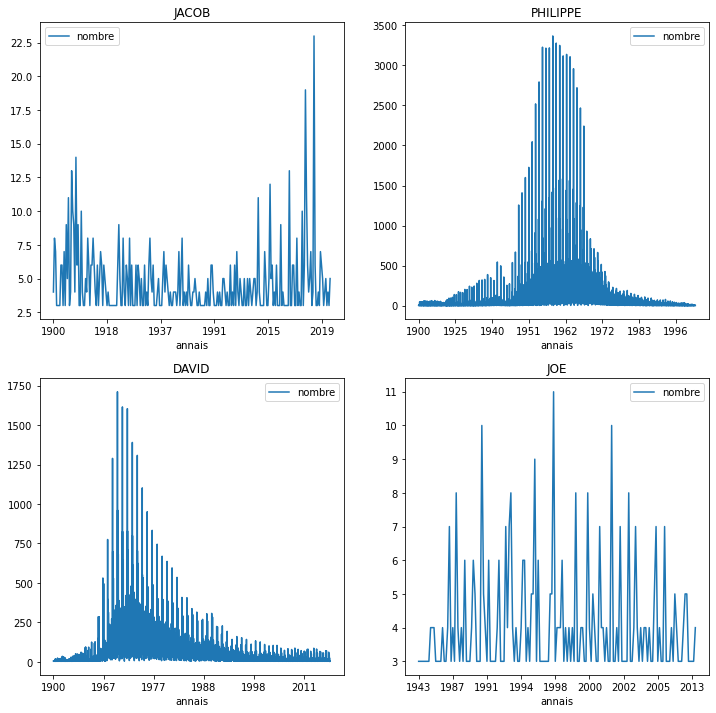

In [29]:
import matplotlib.pyplot as plt
fig, (axes) = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes[0, 0].set_title("JACOB")
axes[0, 1].set_title("PHILIPPE")
axes[1, 0].set_title("DAVID")
axes[1, 1].set_title("JOE")
F1.plot(x='annais', y='nombre',ax = axes[0,0])
F2.plot(x='annais', y='nombre',ax = axes[0,1])
F3.plot(x='annais', y='nombre',ax = axes[1,0])
F4.plot(x='annais', y='nombre',ax = axes[1,1])
plt.show()

 


*   1: belongs to Male firstnames
*   2: belongs to Female Fistnames

Sort them in seperate files for further analysis





In [14]:
Male = FirstNames[FirstNames['sexe']==1]
Female = FirstNames[FirstNames['sexe']==2]

To find the maximum frequency of first name given, we can group gender data with respect to maximum number with years and find which has maximum frequency

In [18]:
male_index = Male.groupby(by=["annais"])['nombre'].transform(max) == Male['nombre']
Male_max = Male[male_index].sort_values('nombre')
Male_max

,sexe,preusuel,annais,dpt,nombre
582855,1,GABRIEL,2018,75,341
25153,1,ADAM,2015,75,357
582462,1,GABRIEL,2014,75,368
582953,1,GABRIEL,2019,75,371
582658,1,GABRIEL,2016,75,372
...,...,...,...,...,...
763361,1,JEAN,1931,75,3555
49630,1,ALAIN,1949,75,3566
764959,1,JEAN,1948,75,4292
764865,1,JEAN,1947,75,5792


In [19]:
female_index = Female.groupby(by=["annais"])['nombre'].transform(max) == Female['nombre']
Female_max = Female[female_index].sort_values('nombre')
Female_max

,sexe,preusuel,annais,dpt,nombre
2868998,2,LOUISE,2019,75,223
2868904,2,LOUISE,2018,75,228
2604546,2,JADE,2017,59,241
2868709,2,LOUISE,2016,75,290
2868611,2,LOUISE,2015,75,292
...,...,...,...,...,...
3011793,2,MARIE,1961,974,3829
3012075,2,MARIE,1964,974,3930
3254108,2,NATHALIE,1966,75,3956
3254014,2,NATHALIE,1965,75,4005


We found that "Jean" in male and "Marie" in female has maximum frequency and following plots have shown it's evolution with the years.

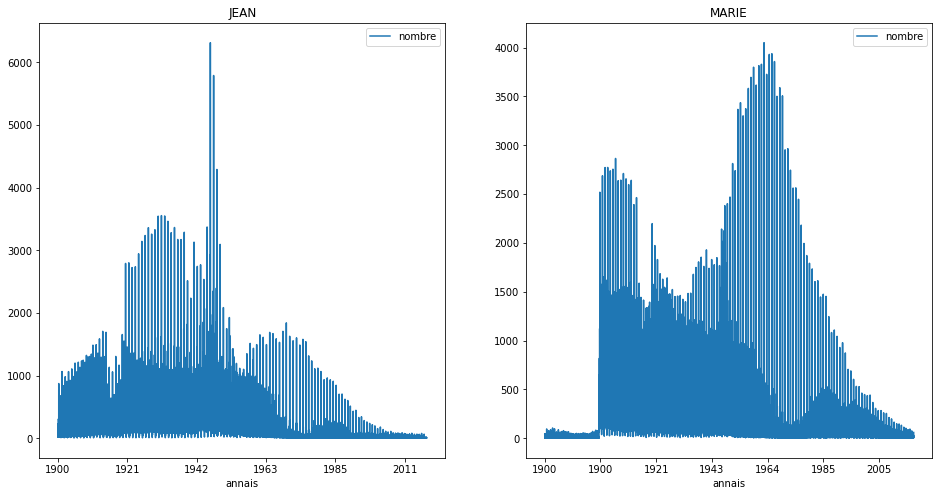

In [28]:
name1 = FirstNames.loc[FirstNames["preusuel"]=="JEAN"]
name2 = FirstNames.loc[FirstNames["preusuel"]=="MARIE"]

fig, (axes) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
axes[0].set_title("JEAN")
axes[1].set_title("MARIE")
name1.plot(x='annais', y='nombre',ax = axes[0])
name2.plot(x='annais', y='nombre',ax = axes[1])
plt.show()